In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
env = gym.make("CartPole-v0")
type(env)

gym.wrappers.time_limit.TimeLimit

In [3]:
env.reset()

array([ 0.03224073, -0.00274987,  0.00170824, -0.0203779 ])

In [5]:
env.observation_space

In [6]:
box.high

array([  4.80000000e+00,   3.40282347e+38,   4.18879020e-01,
         3.40282347e+38])

In [48]:
a_space = env.action_space
a_space

Discrete(2)

In [36]:
def do_episodes(env, episode_cnt=10, parameters=None, plot=False):
    done = False
    episode_cnt = 10
    step_sum = 0
    param_length = env.observation_space.shape[0]
    observation_param = []

    if parameters is None:
        parameters = np.array([np.random.normal() for x in range(param_length)])
        
    for e in range(episode_cnt):
        steps = 0
        observation = env.reset()
        while not done:
            if np.dot(observation, parameters) > 0:
                action = 0
            else:
                action = 1
            observation, reward, done, _ = env.step(action)
            steps+=1
            observation_param.append(observation[3])

        # print "{} steps needed in episode {}".format(steps, e)
        done = False
        step_sum += steps
    print "Done average {} steps".format(step_sum / episode_cnt)
    if plot is not False:
        plt.plot(observation_param)
    return step_sum / episode_cnt, parameters

Done average 60 steps
Done average 9 steps
Done average 10 steps
Best step cnt after 3 tries: 60, parameters: [-0.25532933  1.94122184  0.25978415 -1.19881414]
Playing with best params
Done average 56 steps


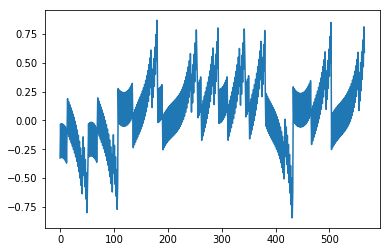

In [44]:
env = gym.make("CartPole-v0")
num_tries = 3
best_steps = float("-inf")
best_params = []
for i in range(num_tries):
    steps, params = do_episodes(env)
    if steps > best_steps:
        best_steps = steps
        best_params = params
print "Best step cnt after {} tries: {}, parameters: {}".format(num_tries, best_steps, best_params)
print "Playing with best params"
# env = gym.wrappers.Monitor(env=env, directory="video")
steps, _ = do_episodes(env, parameters=best_params, episode_cnt=1, plot=True)